In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 28 11:45:29 2020

@author: thomas
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def Tut8_yeo():
    
    # load data
    df = pd.read_csv("government-expenditure-on-education.csv")
    #expenditure = df['total_expenditure_on_education'].to_numpy()
    expenditure = df['recurrent_expenditure_total'].to_numpy()
    years = df['year'].to_numpy()
    
    # create normalized variables
    max_expenditure = max(expenditure)
    max_year = max(years)
    y = expenditure/max_expenditure
    X = np.ones([len(y), 2])
    X[:, 1] = years/max_year

    # Gradient descent 
    learning_rate = 0.03
    w = np.zeros(2)
    pred_y, cost, gradient = exp_cost_gradient(X, w, y) #this function is defined later in the bottom of code
    num_iters = 2000000;
    cost_vec = np.zeros(num_iters)
    print('Initial Cost =', cost)
    for i in range(0, num_iters):
        
        # update w
        w = w - learning_rate*gradient
        
        # compute updated cost and new gradient
        pred_y, cost, gradient = exp_cost_gradient(X, w, y)
        cost_vec[i] = cost
        
        if(i % 200000 == 0):            
            print('Iter', i, ': cost =', cost)
        
    pred_y, cost, gradient = exp_cost_gradient(X, w, y)
    print('Final Cost =', cost)
    
    # Plot cost function values over iterations
    plt.figure(0, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.plot(np.arange(0, num_iters, 1), cost_vec)
    plt.xlabel('Iteration Number') 
    plt.ylabel('Square Error')
    plt.xticks(np.arange(0, num_iters+1, 500000))
    plt.title('Learning rate = ' + str(learning_rate))
    #plt.savefig('Figures/FigTut8Cost' + str(learning_rate) + '.eps')
    
    # Extrapolate until year 2023 
    ext_years = np.arange(min(years), 2024, 1) #arange(start, stop, step) Values are generated
                                                #within the half-open interval [start, stop)
                                                #, with spacing between values given by step.
    ext_X = np.ones([len(ext_years), 2])
    ext_X[:, 1] = ext_years/max_year
    pred_y = np.exp(-ext_X @ w)
    
    # Plot extrapolation
    plt.figure(1, figsize=[9,4.5])
    plt.rcParams.update({'font.size': 16})
    plt.scatter(years, expenditure, s=20, marker='o', c='blue', label='real data')
    plt.plot(ext_years, pred_y * max_expenditure, c='red', label='fitted curve')
    plt.xlabel('Year') 
    plt.ylabel('Expenditure')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.legend(loc='upper left',ncol=3, fontsize=15)
    #plt.savefig('Figures/FigTut8Extrapolation' + str(learning_rate) + '.eps')
    



def exp_cost_gradient(X, w, y):
    
    # Compute prediction, cost and gradient based on mean square error loss
    pred_y = np.exp(-X @ w)
    cost   = np.sum((pred_y - y)*(pred_y - y)) 
    gradient = -2 * (pred_y - y) * pred_y @ X #computing the loss gradient
    
    return pred_y, cost, gradient

Initial Cost = 16.729110005154975
Iter 0 : cost = 8.546351412713127
Iter 200000 : cost = 0.31849090173157557
Iter 400000 : cost = 0.11571560754637525
Iter 600000 : cost = 0.09255211598402699
Iter 800000 : cost = 0.08902105911471314
Iter 1000000 : cost = 0.08842366703744134
Iter 1200000 : cost = 0.08831833150886778
Iter 1400000 : cost = 0.08829943773779207
Iter 1600000 : cost = 0.08829602432919924
Iter 1800000 : cost = 0.08829540576767533
Final Cost = 0.08829529352962265


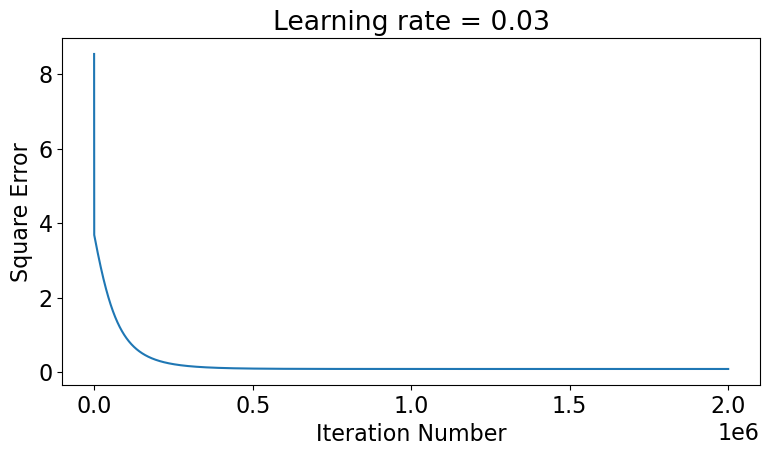

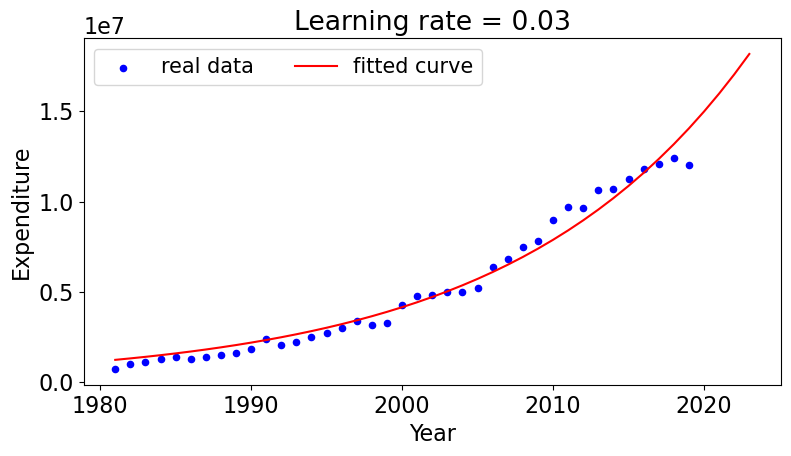

In [2]:
if __name__ == '__main__':
    Tut8_yeo()